Data contain motifs with length 6s (i.e. 60 index points) for each motif

In [1]:
from utils import load_parquet_to_df_list


path = "../../../../0_data/synth_pattern_data_same_length"
df_list = load_parquet_to_df_list(path)

# do not use metadata of time series
df_orig = [df["dim_0"].to_frame() for df in df_list]

In [2]:
df_list[0]

,time,pattern_main_id,pattern_sub_id,dim_0
0,0.1,1,1,86.051849
1,0.2,1,1,53.958517
2,0.3,1,1,66.481573
3,0.4,1,1,59.377757
4,0.5,1,1,74.000092
...,...,...,...,...
2551,255.2,0,3,-11.721518
2552,255.3,0,3,-13.342280
2553,255.4,0,3,-6.397606
2554,255.5,0,3,-12.204379


<AxesSubplot: >

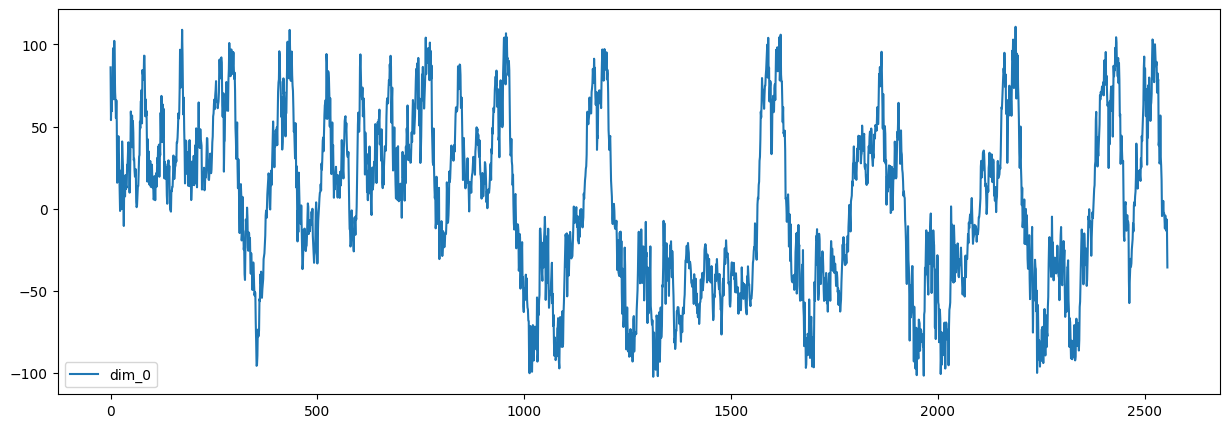

In [3]:
df_orig[0].plot(figsize=(15,5))

In [4]:
from utils import z_normalize


# additionally cut of some time series for a shorter representation
df_norm = z_normalize(df_orig[0].iloc[:400])
num_dfs = len(df_norm)

In [5]:
df_norm

,dim_0
0,1.529122
1,0.682619
2,1.012931
3,0.825558
4,1.211241
...,...
395,0.370183
396,-0.074298
397,0.336019
398,0.256487


In [6]:
from discretization.sax.sax import SAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.persist.persist import Persist


alphabet_size = 8
alphabet_size_slope = 6

sax = SAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size, alphabet_size_slope)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
persist = Persist(alphabet_size)

In [7]:
window_size = 10
sax_variant = one_d_sax
num_compare_segments = 6
p = 1.0
dist_threshold = 100
num_diff_threshold = 2
hamming_threshold = 12

In [8]:
from pattern_recognition.motif_discovery.brute_force.discretized import do_brute_force_discretized


motifs_lst, start, end = do_brute_force_discretized(df_norm, window_size, sax_variant, num_compare_segments, dist_threshold, num_diff_threshold, hamming_threshold, p)

In [9]:
df_list[0].iloc[start[1]:end[1]]

,time,pattern_main_id,pattern_sub_id,dim_0
10,1.1,1,1,86.753755
11,1.2,1,1,70.829414
12,1.3,1,1,65.682044
13,1.4,1,1,55.143686
14,1.5,1,1,65.981526
15,1.6,1,1,52.992544
16,1.7,1,1,15.828026
17,1.8,1,1,17.627464
18,1.9,1,1,37.167012
19,2.0,1,1,44.159119


In [10]:
df_list[0].iloc[start[7]:end[7]]

,time,pattern_main_id,pattern_sub_id,dim_0
70,7.1,-1,-1,32.681349
71,7.2,-1,-1,53.002060
72,7.3,1,9,49.013605
73,7.4,1,9,65.399058
74,7.5,1,9,65.665083
75,7.6,1,9,72.317905
76,7.7,1,9,51.954500
77,7.8,1,9,84.421910
78,7.9,1,9,81.892035
79,8.0,1,9,81.385214


In [11]:
df_list[0].iloc[72:120]

,time,pattern_main_id,pattern_sub_id,dim_0
72,7.3,1,9,49.013605
73,7.4,1,9,65.399058
74,7.5,1,9,65.665083
75,7.6,1,9,72.317905
76,7.7,1,9,51.954500
77,7.8,1,9,84.421910
78,7.9,1,9,81.892035
79,8.0,1,9,81.385214
80,8.1,1,9,78.624766
81,8.2,1,9,93.154538


In [12]:
motifs_lst

[[[0, 7, 16],
  [1, 9, 18],
  [2, 10, 19],
  [3, 12, 20],
  [4, 13],
  [5, 14],
  [6, 15],
  [8, 17]]]

In [13]:
start

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340], dtype=int32)

In [14]:
end[34]

400

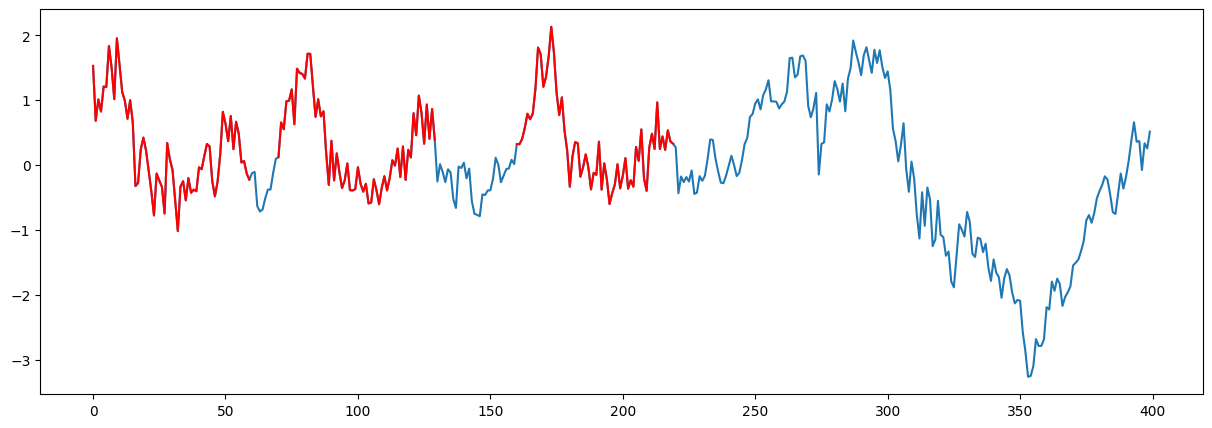

In [15]:
from pattern_recognition.motif_discovery.graphics import highlight_motif


highlight_motif(df_norm, start, end, motifs_lst[0][0], 0)